In [1]:
import numpy as np
import pandas as pd
import os
import json
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sklearn as sk
#from matplotlib import rcParams
from IPython.display import Image, display, HTML
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from pathlib import Path
dataPath = Path()/'..'/'data'

In [2]:
modelList = [('isobench' + str(number).zfill(3)) for number in range(54)]
directoryList = [dataPath / entry for entry in modelList]

In [3]:
dataList = []
inputList = []
for name in directoryList:
    with (name / 'inputs.txt').open() as json_file:  
    #with open(os.path.join(name, 'inputs.txt')) as json_file:  
        inputList.append(json.load(json_file)['params'])
    data = pd.read_csv((name/'zerodData.csv'))
    goodheader = ''.join(list(data.columns.values))[2:].split(' ')
    data.columns = goodheader
    dataList.append(data)
outputFrame = pd.concat(dataList, keys = modelList)
inputFrame = pd.DataFrame(inputList, index = modelList)

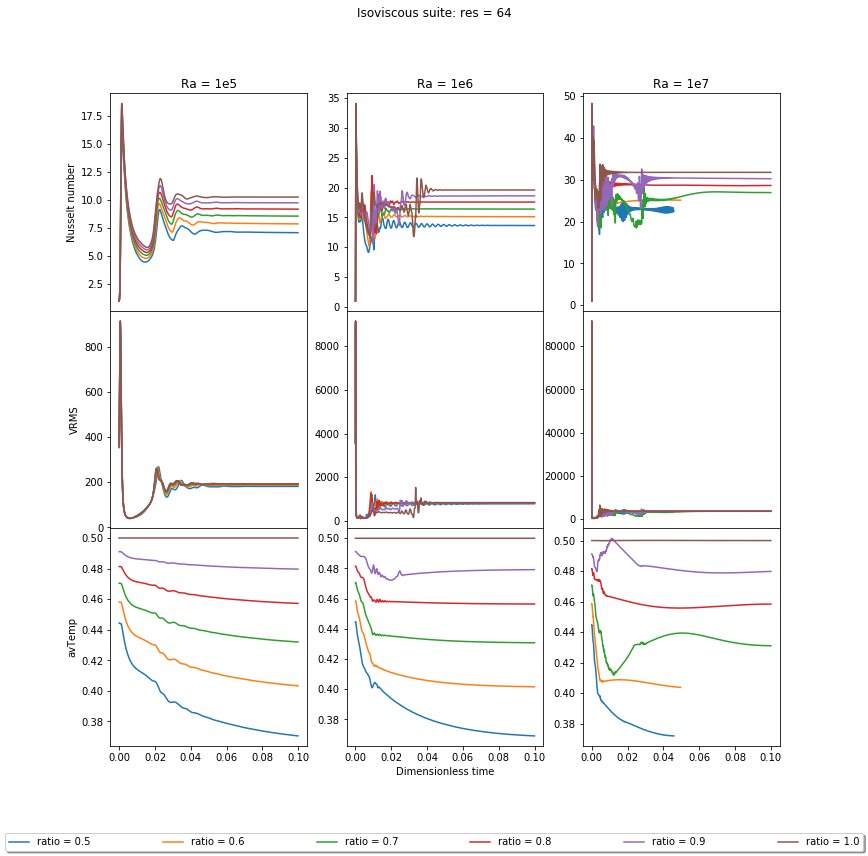

In [4]:
#indices = inputFrame.loc[inputFrame['Ra'] == 1e5].loc[inputFrame['res'] == 32].index

res = 64
maxtime = .1

fig, axs = plt.subplots(3, 3, sharex=True, figsize = (12, 12))

indices = inputFrame.loc[inputFrame['Ra'] == 1e5].loc[inputFrame['res'] == res].index
for index in indices:
    frame = outputFrame.loc[outputFrame['modeltime'] < maxtime].loc[index]
    ignoreme = axs[0][0].plot(frame.modeltime, frame.Nu)
    ignoreme = axs[1][0].plot(frame.modeltime, frame.VRMS)
    ignoreme = axs[2][0].plot(frame.modeltime, frame.avTemp)

indices = inputFrame.loc[inputFrame['Ra'] == 1e6].loc[inputFrame['res'] == res].index
for index in indices:
    frame = outputFrame.loc[outputFrame['modeltime'] < maxtime].loc[index]
    ignoreme = axs[0][1].plot(frame.modeltime, frame.Nu)
    ignoreme = axs[1][1].plot(frame.modeltime, frame.VRMS)
    ignoreme = axs[2][1].plot(frame.modeltime, frame.avTemp)

indices = inputFrame.loc[inputFrame['Ra'] == 1e7].loc[inputFrame['res'] == res].index
for index in indices:
    frame = outputFrame.loc[outputFrame['modeltime'] < maxtime].loc[index]
    ignoreme = axs[0][2].plot(frame.modeltime, frame.Nu)
    ignoreme = axs[1][2].plot(frame.modeltime, frame.VRMS)
    ignoreme = axs[2][2].plot(frame.modeltime, frame.avTemp)

axs[0][0].set_title('Ra = 1e5')
axs[0][1].set_title('Ra = 1e6')
axs[0][2].set_title('Ra = 1e7')
axs[0][0].set_ylabel('Nusselt number')
axs[1][0].set_ylabel('VRMS')
axs[2][0].set_ylabel('avTemp')
axs[2][1].set_xlabel('Dimensionless time')

legendtext = ['ratio = ' + str(val) for val in list(inputFrame.loc[indices].ratio)]
legend = plt.figlegend(
    legendtext,
    loc='lower center',
    shadow = True,
    ncol = 6,
    mode = 'expand',
    )
fig.subplots_adjust(hspace=0)
fig.suptitle('Isoviscous suite: res = 64')
fig.show()

In [5]:
indices = inputFrame.loc[inputFrame['res'] == 64].index
allwaDict = {}
for index in indices:
    waDict = {}
    frame = outputFrame.loc[outputFrame['modeltime'] > 0.04].loc[index]
    tIntervals = frame['modeltime'].diff()
    for item in frame.columns.values:
        if not item == 'modeltime':
            waDict[item + '_tAv'] = np.average(frame[item][1:], weights = tIntervals[1:])
    allwaDict[index] = waDict
reductionFrame = pd.DataFrame(allwaDict).transpose()

superFrame = pd.concat([inputFrame.loc[indices], reductionFrame], axis = 1)[
    ['Ra', 'ratio', 'Nu_tAv', 'VRMS_tAv', 'avTemp_tAv', 'surfVRMS_tAv']
    ]

In [6]:
superFrame

,Ra,ratio,Nu_tAv,VRMS_tAv,avTemp_tAv,surfVRMS_tAv
isobench001,100000.0,0.5,7.033299,181.434698,0.365737,216.278290
isobench004,100000.0,0.6,7.828811,186.629173,0.399551,217.526424
isobench007,100000.0,0.7,8.527390,189.987895,0.428974,217.318493
isobench010,100000.0,0.8,9.162543,192.018188,0.455314,216.249741
isobench013,100000.0,0.9,9.736639,193.056290,0.478833,214.547183
isobench016,100000.0,1.0,10.259007,193.356946,0.499998,212.404895
isobench019,1000000.0,0.5,13.638789,784.327327,0.369858,934.290829
isobench022,1000000.0,0.6,15.117132,808.956629,0.401872,944.058283
isobench025,1000000.0,0.7,16.393301,823.729417,0.430739,945.389056
isobench028,1000000.0,0.8,17.568652,832.191228,0.456420,942.627054


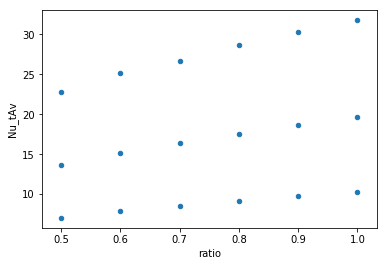

In [7]:
superFrame.plot.scatter('ratio', 'Nu_tAv')

In [21]:
from sklearn import linear_model

In [25]:
lm1e5 = linear_model.LinearRegression()
lm1e5.fit(superFrame.loc[superFrame.Ra == 1e5][['ratio']], superFrame.loc[superFrame.Ra == 1e5].Nu_tAv)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [26]:
lm1e6 = linear_model.LinearRegression()
lm1e6.fit(superFrame.loc[superFrame.Ra == 1e5][['ratio']], superFrame.loc[superFrame.Ra == 1e6].Nu_tAv)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [27]:
lm1e7 = linear_model.LinearRegression()
lm1e7.fit(superFrame.loc[superFrame.Ra == 1e5][['ratio']], superFrame.loc[superFrame.Ra == 1e7].Nu_tAv)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [84]:
dataY = [item.coef_[0] for item in [lm1e5, lm1e6, lm1e7]]
dataX = [5, 6, 7]

In [95]:
dataY

[6.424907428832346, 11.853379779042704, 17.83511288231379]

In [85]:
lmRa = linear_model.LinearRegression()
lmRa.fit([[item] for item in dataX], dataY)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [88]:
newframe = pd.DataFrame({'Ra': dataX, 'coef': dataY})

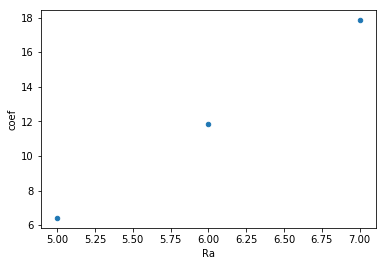

In [90]:
newframe.plot.scatter('Ra', 'coef')

###

In [115]:
dataX = 1. / superFrame.loc[superFrame.Ra == 1e5]['ratio']
dataY = superFrame.loc[superFrame.Ra == 1e5]['Nu_tAv']

In [124]:
newframe = pd.DataFrame({'dataX': dataX, 'dataY': dataY})

In [125]:
newframe

,dataX,dataY
isobench001,2.000000,7.033299
isobench004,1.666667,7.828811
isobench007,1.428571,8.527390
isobench010,1.250000,9.162543
isobench013,1.111111,9.736639
isobench016,1.000000,10.259007


In [126]:
lm1e5 = linear_model.LinearRegression(fit_intercept = False)
lm1e5.fit([[item] for item in dataX], dataY)
lm1e5.intercept_

0.0

In [123]:
lm1e5.score([[item] for item in dataX], dataY)

-7.055367703286771

In [100]:
help(linear_model.LinearRegression)

Help on class LinearRegression in module sklearn.linear_model.base:

class LinearRegression(LinearModel, sklearn.base.RegressorMixin)
 |  Ordinary least squares Linear Regression.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : boolean, optional, default True
 |      whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (e.g. data is expected to be already centered).
 |  
 |  normalize : boolean, optional, default False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |      subtracting the mean and dividing by the l2-norm.
 |      If you wish to standardize, please use
 |      :class:`sklearn.preprocessing.StandardScaler` before calling ``fit`` on
 |      an estimator with ``normalize=False``.
 |  
 |  copy_X : boolean, optional, default True
 |      If True, X will be copied; else, it may be overwritten.
 | 